### Var olan adres alanlarını  bulduğumuzda saydığımız regex:

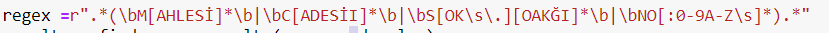



#### Çözümlenebilen Adres Sayısı: 6720
#### Çözümlenemeyen (mahalle, cadde, sokak,no bilgileri olmayan ilanlar): 111 adet

In [1]:
# import libraries
import re
import pandas as pd
import numpy as np

## Veri Yükleme/İnceleme

In [2]:
# read data
adresler = pd.read_csv('Adres.txt', sep="\n", header=None)
adresler = adresler.values.tolist()
adresler = [data[0] for data in adresler]

In [3]:
print(f"Veri setindeki toplam adres sayısı: {len(adresler)}")

Veri setindeki toplam adres sayısı: 6831


## Kullanılan Methodlar


In [4]:
def find_regex_results(regex, data_list):
    """
    This method search regex in given data and returns the results
    :param regex: regular expression, :type str
    :param data_list: data list to search regex, :type list
    
    :return: list of result, :rtype list
    """
    matched = list()
    not_matched = list()
    for data in data_list:
        match = re.search(regex, data)
        if match:
            matched.append(match.group(0))
        else:
            not_matched.append(data)
    return matched, not_matched
    

In [5]:
def regex_for_one(regex, string):
    """
    Finds regex pattern in given string
    """
    match = re.search(regex, string)
    if match:
        return match.group(0)
    else:
        return None
        

## Veri Alanlarının Ayrı Ayrı Bulunması: mahalle, cadde, sokak, blok/apt no, ilçe, il

In [6]:
# Mahalle bilgisini bulabilmek için kullanılmış regex
# veriler incelendiğinde mahalle bilgisi MAH., M., MH., MAH.<YAZI>, MH.<YAZI>, MAHALLE, MAHALLESİ
#şekilllerinde veya
# hiç mahalle bilgisinin gelmediği görülmüştür.
regex_mahalle = r"\bM[AHLESİ]*\b"
mahalle_results, unmatched = find_regex_results(regex_mahalle, adresler)

print(f"Toplamda mahalle bilgisi olan adresler: {len(mahalle_results)}")
print(f"Toplam mahalle bilgisi bulunamayan adresler: {len(unmatched)}")
print(f"Farklı mahalle kullanımları: {set(mahalle_results)}")

# mahalle bilgileri için açın
# mahalle_results

Toplamda mahalle bilgisi olan adresler: 5976
Toplam mahalle bilgisi bulunamayan adresler: 855
Farklı mahalle kullanımları: {'M', 'MAHALLESİ', 'MH', 'MAHALLE', 'MALLESİ', 'MAHALLSESİ', 'MAH', 'MAHH'}


In [7]:
# Cadde bilgisini bulabilmek için kullanılmış regex
# veriler incelendiğinde CAD., CAD, CD. , C, CADDE, CADDESİ, CAD.<YAZI>
#veya bu bilginin
# hiç girilmediği gözlemlenmiştir
regex_cadde = r"\bC[AD\.ESİI]*\b"
cadde_results, unmatched = find_regex_results(regex_cadde, adresler)

print(f"Toplamda cadde bilgisi olan adresler: {len(cadde_results)}")
print(f"Toplam cadde bilgisi bulunamayan adresler: {len(unmatched)}")
print(f"Farklı cadde kullanımları: {set(cadde_results)}")

# caddeler = []
# caddeler = find_regex_results(r"(?<=MAH.).*[A-ZİŞĞŞÇÖÜ\s]*\bC[ADDESİI]*[\b\.]", adresler)
# print(f"Farklı cadde ismi örnekleri: {set(caddeler)}")

Toplamda cadde bilgisi olan adresler: 5127
Toplam cadde bilgisi bulunamayan adresler: 1704
Farklı cadde kullanımları: {'CD', 'CAD.', 'CADDESI', 'CAD', 'CADDES', 'CAD..', 'C.', 'CADDESİ', 'CD.', 'CADDE', 'C'}


In [8]:
# Sokak bilgisini bulabilmek için kullanılan regex
# sokak bilgisi verilerde farklı şekillerde bulunmaktadır:
# SOK., SOK, SK., SOKAĞI, SOKAK, <YAZI>.SOK, SOK.<YAZI>, SK.<YAZI>
regex_sokak = r"\bS[OK\s\.][\.AKĞI]*\b"
sokak_results, unmatched = find_regex_results(regex_sokak, adresler)

print(f"Toplamda sokak bilgisi olan adresler: {len(sokak_results)}")
print(f"Toplam sokak bilgisi bulunamayan adresler: {len(unmatched)}")
print(f"Farklı sokak kullanımları: {set(sokak_results)}")
#sokaklar = find_regex_results(r"[A-ZİŞĞŞÇÖÜ\s]*\bS[OK\s\.][\.AKĞI]*\b", adresler)
#print(f"Farklı sokaklar: {set(sokaklar)}")

Toplamda sokak bilgisi olan adresler: 1504
Toplam sokak bilgisi bulunamayan adresler: 5327
Farklı sokak kullanımları: {'S ', 'SOKAK', 'SK.', 'SOK.', 'S.', 'SK', 'SOKAĞI', 'SOK'}


In [9]:
# blok/apt no bilgisi
regex_no = r"\bNO[:0-9\s]*[/-]*[0-9]*[0-9A-Z\s]?[A-Z]?\b"
no_results, unmatched = find_regex_results(regex_no, adresler)

print(f"Toplamda apt/blok no bilgisi olan adresler: {len(no_results)}")
print(f"Toplam apt/blok no bilgisi bulunamayan adresler: {len(unmatched)}")

Toplamda apt/blok no bilgisi olan adresler: 5920
Toplam apt/blok no bilgisi bulunamayan adresler: 911


In [10]:
#ilçe bilgisinin çıkarılması
regex_ilce = r"\b[A-ZÖĞŞİÇÜ]*/\s\b"
ilce_results, unmatched = find_regex_results(regex_ilce, adresler)

print(f"Toplamda ilçe bilgisi olan adresler: {len(ilce_results)}")
print(f"Toplam ilçe bilgisi bulunamayan adresler: {len(unmatched)}")
print(f"Farklı ilçe kullanımları: {set(ilce_results)}")

Toplamda ilçe bilgisi olan adresler: 6831
Toplam ilçe bilgisi bulunamayan adresler: 0
Farklı ilçe kullanımları: {'ATAŞEHİR/ ', 'FATİH/ ', '/ ', 'SULTANGAZİ/ ', 'MERKEZ/ ', 'KÜÇÜKÇEKMECE/ ', 'BEYOĞLU/ ', 'BAKIRKÖY/ ', 'ŞİLE/ ', 'BAHÇELİEVLER/ ', 'ESENLER/ ', 'GEBZE/ ', 'BAĞCILAR/ ', 'BÜYÜKÇEKMECE/ ', 'KAĞITHANE/ ', 'ŞİŞLİ/ ', 'TUZLA/ ', 'SARIYER/ ', 'GÜNGÖREN/ ', 'KADIKÖY/ ', 'ARNAVUTKÖY/ ', 'SULTANBEYLİ/ ', 'BEŞİKTAŞ/ ', 'BAYRAMPAŞA/ ', 'BEYLİKDÜZÜ/ ', 'MALTEPE/ ', 'GAZİOSMANPAŞA/ ', 'ZEYTİNBURNU/ ', 'KARTAL/ ', 'PENDİK/ ', 'ÇEKMEKÖY/ ', 'SİLİVRİ/ ', 'BEYKOZ/ ', 'EYÜPSULTAN/ ', 'SANCAKTEPE/ ', 'ÇATALCA/ ', 'ÜSKÜDAR/ ', 'AVCILAR/ ', 'ÜMRANİYE/ ', 'DARICA/ ', 'DURUSU/ ', 'BAŞAKŞEHİR/ ', 'ESENYURT/ '}


## Tüm Veri Alanlarının Dolu Olduğu Adreslerin Bulunması


In [11]:
# tüm veri alanları dolu kabul edildi
regex =r".*\bM[AHLESİ]*\b.*\bC[ADESİI]*\b.*\bS[OK\s\.][OAKĞI]*\b.*\bNO[:0-9A-Z\s]*.*"
matched, not_mathed = find_regex_results(regex, adresler)
print("\033[1m" + "Tüm adres alanlarının dolu olduğu adresler: \n" + "\033[0m")
for i, result in enumerate(matched):
    print(f"{i+1}: {result}")

Tüm adres alanlarının dolu olduğu adresler: 

1: YEŞİL PINAR MAH. GİRNE CAD. MUHTAR CAMİİ SOK. NO:1 EYÜPSULTAN/ İSTANBUL
2: SİFA MAH. SEKERPINAR CAD. DİNÇÖZ SOK. NO:26 TUZLA/ İSTANBUL
3: YARIM BURGAZ MAH.  KURUÇEŞME CAD. YONCA SOK. NO:1 KÜÇÜKÇEKMECE/ İSTANBUL
4: BAHÇELİEVLER MAH. DEREBOYU CAD. KARAMAN SOK. NO: 30/4 ÜSKÜDAR/ İSTANBUL
5: KİRAZLIDERE MAH. MARAŞAL FEVZİ ÇAKMAK CAD. OYA SOK NO:2/1 ÇEKMEKÖY/ İSTANBUL
6: MENDERES MAH. ATIŞ ALANI CAD. 369 SOK. NO:1C ESENLER/ İSTANBUL
7: MEHMET AKİF MAHALLESİ CUMHURİYET CADDESİ COŞKUN SOKAK NO:17 ÇEKMEKÖY/ İSTANBUL
8: ETİLER MAH. NİSPETİYE CAD. SEHER YILDIZ SOK. NO:2 BEŞİKTAŞ/ İSTANBUL
9: TAHTAKALE MAH OKUL YOLU CAD ESEN SOK NO 11 AVCILAR/ İSTANBUL
10: MEHMET AKİF MAH ASİKVEYSEL CAD 1,HİLAL SOKAK NO :2 KÜÇÜKÇEKMECE/ İSTANBUL
11: HIRKA-I SERİF MAH MAH. LÜLECİYEKTA CAD. LÜLECİ YEKTA SOK. NO : 1 DAİRE : 1 KAT : 1 FATİH/ İSTANBUL
12: MECLİS MAH CEMAL GÜR SEL CAD SONER SOK NO 47 SANCAKTEPE/ İSTANBUL
13: MECIDIYE MAH MECIDIYE CAD AKARCAY SOKAK NO :13

## Adres Alanları Çözümlenen-Çözümlenemeyenler


In [7]:
regex =r".*(\bM[AHLESİ]*\b|\bC[ADESİI]*\b|\bS[OK\s\.][OAKĞI]*\b|\bNO[:0-9A-Z\s]*).*"
results, not_found = find_regex_results(regex, adresler)
print("\033[1m" + f"Alanların en az biri dolu olduğu adresler sayısı: {len(results)} \n" + "\033[0m")
#for i, result in enumerate(results):
#    print(f"{i+1}: {result}")

Alanların en az biri dolu olduğu adresler sayısı: 6720 



In [8]:
#print("\033[1m" + "Verilen regex ile bulunamayan adresler:\n" + "\033[0m")
#for i, result in enumerate(not_mathed):
#    print(f"{i+1}: {result}")

In [9]:
print("\033[1m" + f"Regex ile çözülemeyen adresler(ilçe/il bakılmadı): {len(not_found)} adet" + "\033[0m")
for i, result in enumerate(not_found):
    print(f"{i+1}: {result}")

Regex ile çözülemeyen adresler(ilçe/il bakılmadı): 111 adet
1: YENİBOSNA  METRO İSTASYONU BAKIRKÖY/ İSTANBUL
2: ORTAÇEŞME SONDURAK BEYKOZ/ İSTANBUL
3: TOPKAPI TİCARET MERKEZİ KARŞISI ÜSTGEÇİT ALTI ZEYTİNBURNU/ İSTANBUL
4: KADIKÖY DENİZ OTOBÜSÜ İSEKELE ÖNÜ RASİMPAŞA KADIKÖY/ İSTANBUL
5: E5 KARAYOLU ÜZERİ GÖZTEPE OTOBÜS DURAGI YANI KADIKÖY/ İSTANBUL
6: BEYLERBEYİ TÜNEL ÇIKIŞI ÜSKÜDAR/ İSTANBUL
7: HASANPAŞA UZUNÇAYIR METROBÜS DURAĞI KADIKÖY/ İSTANBUL
8: SSK OKMEYDANI HASTANE ÖNÜ HALK EKMEK ŞİŞLİ/ İSTANBUL
9: KARTAL KÖPRÜSÜ ALTI METRO ÇIKIŞI ANKARA İSTİKAMETİ E5 YAN YOL KARTAL/ İSTANBUL
10: YENİBOSNA  METRO İSTASYONU BAKIRKÖY/ İSTANBUL
11: ORTAÇEŞME SONDURAK BEYKOZ/ İSTANBUL
12: TOPKAPI TİCARET MERKEZİ KARŞISI ÜSTGEÇİT ALTI ZEYTİNBURNU/ İSTANBUL
13: KADIKÖY DENİZ OTOBÜSÜ İSEKELE ÖNÜ RASİMPAŞA KADIKÖY/ İSTANBUL
14: E5 KARAYOLU ÜZERİ GÖZTEPE OTOBÜS DURAGI YANI KADIKÖY/ İSTANBUL
15: BEYLERBEYİ TÜNEL ÇIKIŞI ÜSKÜDAR/ İSTANBUL
16: HASANPAŞA UZUNÇAYIR METROBÜS DURAĞI KADIKÖY/ İSTANBUL
17: SSK OKM

In [10]:
# parsing data
mahalle = r".*\bM[AHLESİ]*\.?\b"
cadde = r"((?<=MAHALLESİ)|(?<=MAH.)|(?<=MAH)|(?<=MH.)).*\bC[ADESİI]*\.?\b"
cadde_2 = r"\b.*\bC[ADESİI]*\.?\b"
sokak = r"((?<=CAD.)|(?<=CAD)|(?<=CD.)).*\bS[OK\s\.][AKĞI]*\.?\b"
sokak_2 = r"((?<=MAHALLESİ)|(?<=MAH.)|(?<=MH.)).*\bS[OK\s\.][AKĞI]*\.?\b"
sokak_3 = r"\b.*\bS[OK\s\.][AKĞI]*\.?\b"
no = r"\bNO[\.:0-9\s]*[/-]*[0-9]*[0-9A-Z\s]?[A-Z]?\b"
ilce = r"\b[A-ZÖĞŞİÇÜ]*/\s\b"
regexes_adresler = {"\033[1m" +'mahalle'+ "\033[0m":mahalle, 
                    "\033[1m" +'cadde'+ "\033[0m":cadde, 
                    "\033[1m" +'sokak'+ "\033[0m":sokak, 
                    "\033[1m" +'no'+ "\033[0m":no, 
                    "\033[1m" +'ilce'+ "\033[0m":ilce}

In [11]:
print("\033[1m" + "Adres bilgilerinin çözümlenmesi:\n" + "\033[0m")
cozumlenemeyenler = list()
for i, adres in enumerate(adresler[:30]):
    count = 0
    print(f"\n{str(i+1)}: {adres}:\n")
    for regex_name, regex in regexes_adresler.items():
        res = regex_for_one(regex, adres)
        if regex_name == "\033[1m" +'cadde'+ "\033[0m" and res is None:
            res = regex_for_one(cadde_2, adres)
        if regex_name == "\033[1m" +'ilce'+ "\033[0m":
            res = res.replace('/', "")
        if regex_name == "\033[1m" +'sokak'+ "\033[0m" and res is None:
            res = regex_for_one(sokak_2, adres)
            res = regex_for_one(sokak_3, adres) if res is None else res
        if res is None:
            count += 1
        print(f'\t{regex_name}: {res}')
    if count == 4:
        cozumlenemeyenler.append(adres)
        
        

Adres bilgilerinin çözümlenmesi:


1: YENİBOSNA  METRO İSTASYONU BAKIRKÖY/ İSTANBUL:

	mahalle: None
	cadde: None
	sokak: None
	no: None
	ilce: BAKIRKÖY 

2: KENNEDY CAD. SİRKECİ ARABALI VAPUR İSKELESİ FATİH/ İSTANBUL:

	mahalle: None
	cadde: KENNEDY CAD
	sokak: None
	no: None
	ilce: FATİH 

3: YAVUZTÜRK MAH. KARADENİZ CAD. NO:2 ÜSKÜDAR/ İSTANBUL:

	mahalle: YAVUZTÜRK MAH
	cadde: . KARADENİZ CAD
	sokak: None
	no: NO:2 
	ilce: ÜSKÜDAR 

4: HAMİDİYE MAH. ALPEREN SOK. NO:15/2  ÇEKMEKÖY/ İSTANBUL:

	mahalle: HAMİDİYE MAH
	cadde: None
	sokak:  ALPEREN SOK
	no: NO:15/2
	ilce: ÇEKMEKÖY 

5: UĞUR MUMCU MAH. YUNUS EMRE CAD. NO:25 KARTAL/ İSTANBUL:

	mahalle: UĞUR MUMCU MAH
	cadde: . YUNUS EMRE CAD
	sokak: None
	no: NO:25 
	ilce: KARTAL 

6: BAĞLARBAŞI MAH İNÖNÜ CAD NO:3  MALTEPE/ İSTANBUL:

	mahalle: BAĞLARBAŞI MAH
	cadde:  İNÖNÜ CAD
	sokak: None
	no: NO:3  
	ilce: MALTEPE 

7: HASANPAŞA MAH. FAHRETTİN KERİM GÖKAY CAD. KADIKÖY/ İSTANBUL:

	mahalle: HASANPAŞA MAH
	cadde: . FAHRETTİN KERİM GÖKAY 

In [12]:
print("\033[1m" + f"Verilen regex ile bulunamayan adresler(ilçe/il bakılmadı):{len(cozumlenemeyenler)} adet\n" + "\033[0m")
for i, result in enumerate(cozumlenemeyenler):
    print(f"{i+1}: {result}")

Verilen regex ile bulunamayan adresler(ilçe/il bakılmadı):2 adet

1: YENİBOSNA  METRO İSTASYONU BAKIRKÖY/ İSTANBUL
2: ORTAÇEŞME SONDURAK BEYKOZ/ İSTANBUL
